#### Importing libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("retail_sales_dataset.csv")  #importing dataset

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
#checking for null values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.shape

(1000, 9)

#### Exploratory Data Analysis

In [7]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Minimum age is 18 and maximum is 64 year

Minimum cost per unit-25 and maximum is 500



In [10]:
df['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

<AxesSubplot:title={'center':'Count of Product Category'}, xlabel='Product Category', ylabel='Count'>

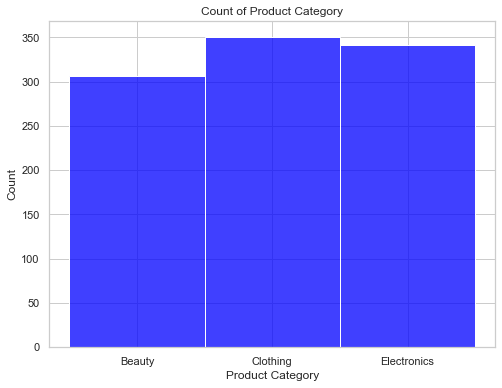

In [46]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
plt.title('Count of Product Category')
sns.histplot(x=df['Product Category'],color="blue")


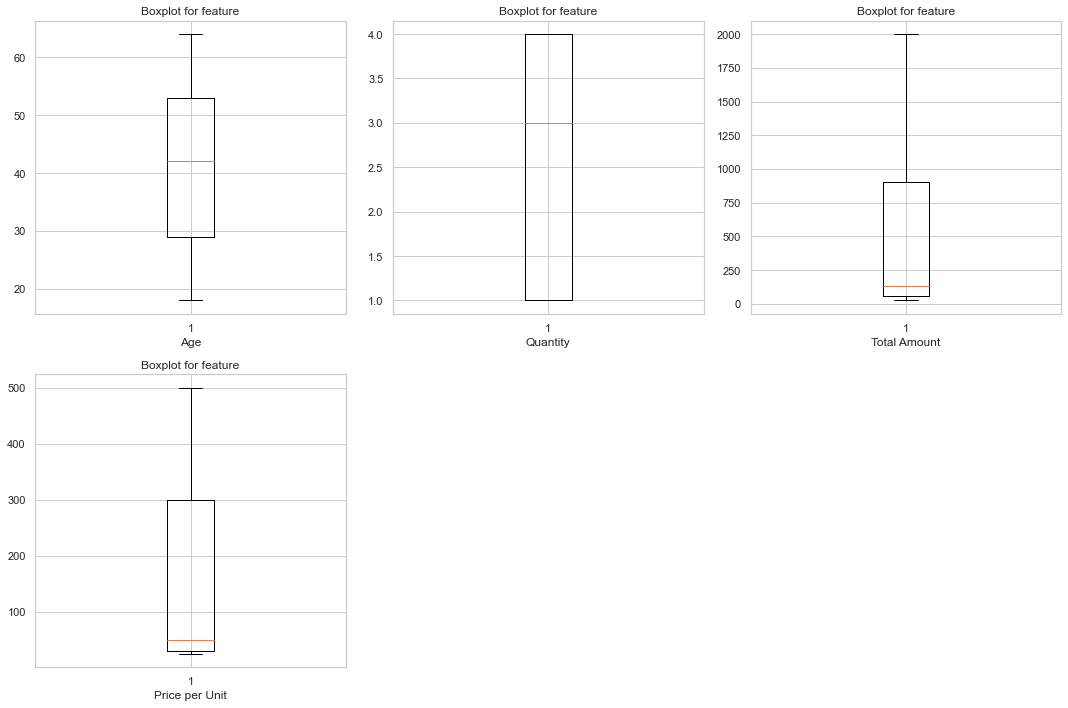

In [156]:
features = ['Age','Quantity','Total Amount','Price per Unit']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(x=df[feature])
    plt.title('Boxplot for feature')
    plt.xlabel(feature)
    

plt.tight_layout()
plt.show()

Which product categories hold the highest appeal among customers?

In [85]:
sum_total_cost=pd.DataFrame(df.groupby('Product Category')['Total Amount'].sum())
sum_total_cost.reset_index(inplace=True)

In [86]:
sum_total_cost

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


<AxesSubplot:xlabel='Product Category', ylabel='Total Amount'>

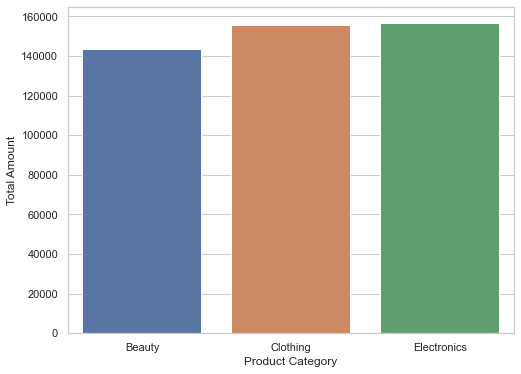

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x=sum_total_cost['Product Category'],y=sum_total_cost['Total Amount'])

Electronics category of product have highest appeal

In [49]:
#label encoding categorical variables [gender,product category]
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [50]:
df['Gender'] = lbl.fit_transform(df['Gender'])

In [51]:
df['Product Category']=lbl.fit_transform(df['Product Category'])

In [53]:
df.head()
#male-1
#female-0

#beauty-0
#clothing-1
#electronics-2

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,1,34,0,3,50,150
1,2,2023-02-27,CUST002,0,26,1,2,500,1000
2,3,2023-01-13,CUST003,1,50,2,1,30,30
3,4,2023-05-21,CUST004,1,37,1,1,500,500
4,5,2023-05-06,CUST005,1,30,0,2,50,100


In [54]:
colms=['Transaction ID','Customer ID']
df.drop(columns=colms,inplace=True)

In [57]:
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day
0,2023-11-24,1,34,0,3,50,150,2023,11,24
1,2023-02-27,0,26,1,2,500,1000,2023,2,27
2,2023-01-13,1,50,2,1,30,30,2023,1,13
3,2023-05-21,1,37,1,1,500,500,2023,5,21
4,2023-05-06,1,30,0,2,50,100,2023,5,6


### Yearly Analysis

In [56]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [64]:
df_2023=df[df['Year'] == 2023]

In [66]:
df_2023.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day
0,2023-11-24,1,34,0,3,50,150,2023,11,24
1,2023-02-27,0,26,1,2,500,1000,2023,2,27
2,2023-01-13,1,50,2,1,30,30,2023,1,13
3,2023-05-21,1,37,1,1,500,500,2023,5,21
4,2023-05-06,1,30,0,2,50,100,2023,5,6


In [117]:
monthly2023=pd.DataFrame(df_2023.groupby(['Month','Product Category'])['Total Amount'].sum())
monthly2023.reset_index(inplace=True)

In [119]:
monthly2023.head()

,Month,Product Category,Total Amount
0,1,0,12430
1,1,1,13125
2,1,2,9895
3,2,0,14035
4,2,1,14560


Text(0.5, 1.0, 'Monthly sum of total amount for year 2023')

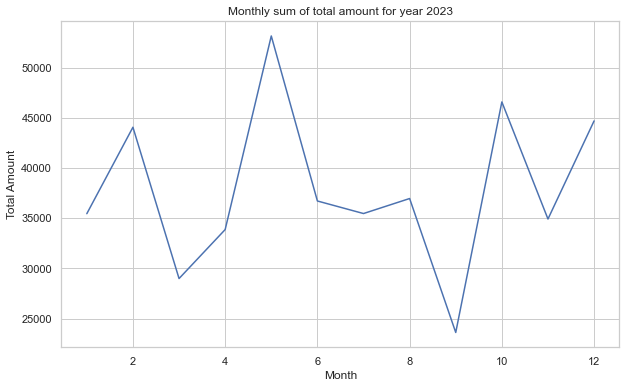

In [115]:
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly2023['Month'],y=monthly2023['Total Amount'])
plt.title("Monthly sum of total amount for year 2023")

Month of May records highest sum whereas september records lowest.

<AxesSubplot:xlabel='Month', ylabel='Total Amount'>

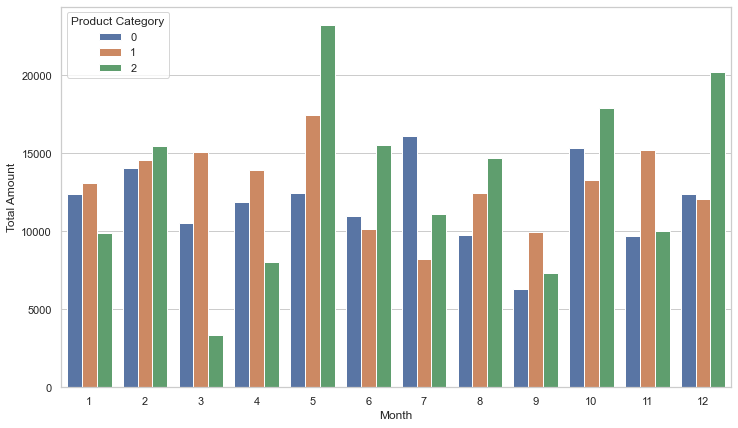

In [113]:
plt.figure(figsize=(12,7))
sns.barplot(x=monthly2023['Month'],y=monthly2023['Total Amount'],hue=monthly2023['Product Category'])

#### It is observed that during month of MAY electronics have highest sale maybe because seasonal factors like summer season increase the sale of AC ,etc

In [99]:
df_2024=df[df['Year'] == 2024]

In [102]:
df_2024

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day
210,2024-01-01,1,42,0,3,500,1500,2024,1,1
649,2024-01-01,1,55,2,1,30,30,2024,1,1


#### There are only two records for year 2024


In [120]:
df.corr()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day
Gender,1.000000,0.002621,0.034423,-0.028023,-0.000961,-0.001001,0.045671,-0.027250,-0.066979
Age,0.002621,1.000000,0.039186,-0.023737,-0.038423,-0.060568,0.023269,-0.000640,0.041899
Product Category,0.034423,0.039186,1.000000,-0.010963,-0.003874,-0.005705,-0.001947,0.058968,-0.042575
Quantity,-0.028023,-0.023737,-0.010963,1.000000,0.017501,0.373707,-0.020324,-0.021803,0.029650
Price per Unit,-0.000961,-0.038423,-0.003874,0.017501,1.000000,0.851925,0.020097,-0.008161,0.018303
Total Amount,-0.001001,-0.060568,-0.005705,0.373707,0.851925,1.000000,0.024714,-0.005197,0.036889
Year,0.045671,0.023269,-0.001947,-0.020324,0.020097,0.024714,1.000000,-0.071981,-0.072244
Month,-0.027250,-0.000640,0.058968,-0.021803,-0.008161,-0.005197,-0.071981,1.000000,-0.013895
Day,-0.066979,0.041899,-0.042575,0.029650,0.018303,0.036889,-0.072244,-0.013895,1.000000


<AxesSubplot:>

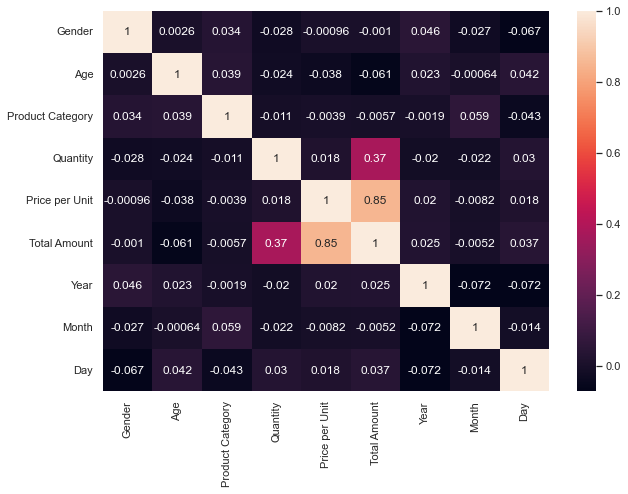

In [126]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

#### Price per unit and Total amount are highly correlated.

### Gender-wise analysis

In [132]:
df_female=df[df['Gender']==0]
df_male=df[df['Gender']==1]

In [144]:
df_female=pd.DataFrame(df_female.groupby('Product Category')['Total Amount'].sum())
df_female.reset_index(inplace=True)

<AxesSubplot:xlabel='Product Category', ylabel='Total Amount'>

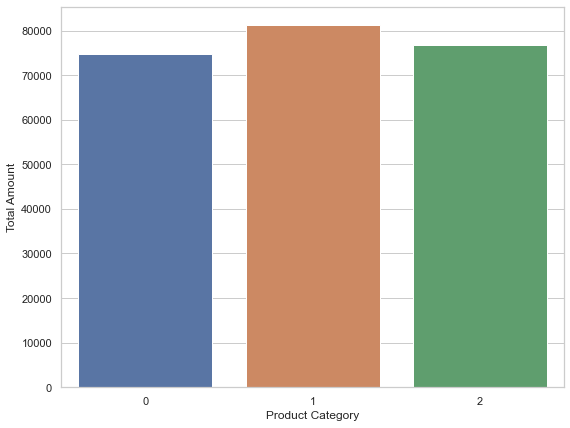

In [146]:
plt.figure(figsize=(9,7))
sns.barplot(x=df_female['Product Category'],y=df_female['Total Amount'])

In [133]:
df_male.groupby('Product Category')['Total Amount'].sum()


Product Category
0    68685
1    74305
2    80170
Name: Total Amount, dtype: int64

In [147]:
df_male=pd.DataFrame(df_male.groupby('Product Category')['Total Amount'].sum())
df_male.reset_index(inplace=True)

<AxesSubplot:xlabel='Product Category', ylabel='Total Amount'>

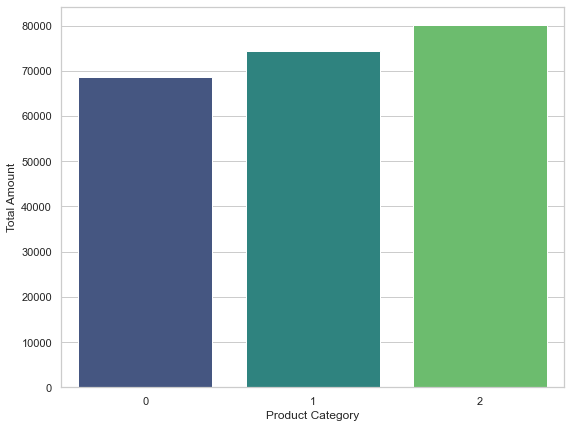

In [148]:
plt.figure(figsize=(9,7))
sns.barplot(x=df_male['Product Category'],y=df_male['Total Amount'],palette='viridis')

 It is observed that female customers are more interested in buying clothes and beauty products than male customers. Male customers are more interested in electronics category.

#### Age-wise Analysis 

In [140]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Define your age ranges here
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100']  # Define corresponding labels

# Create age ranges column
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age range and calculate the sum of 'Total Amount'
sum_total_cost_by_age_range = pd.DataFrame(df.groupby(['Age Range','Product Category'])['Total Amount'].sum())
sum_total_cost_by_age_range.reset_index(inplace=True)

sum_total_cost_by_age_range.head()

,Age Range,Product Category,Total Amount
0,0-20,0,9325
1,0-20,1,6815
2,0-20,2,9945
3,21-30,0,32075
4,21-30,1,39335


<AxesSubplot:xlabel='Age Range', ylabel='Total Amount'>

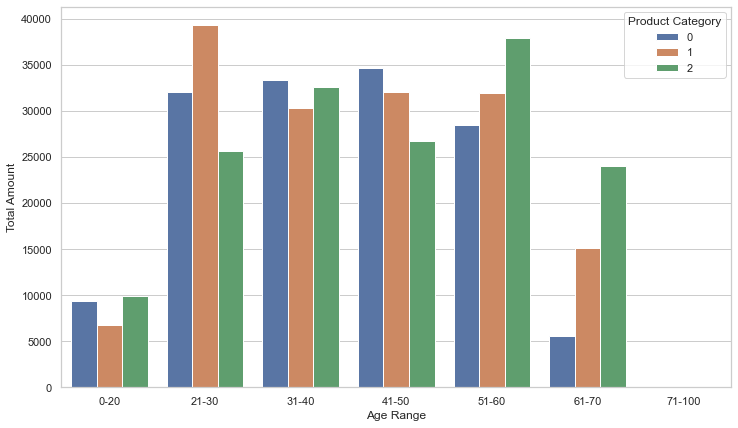

In [142]:
plt.figure(figsize=(12,7))
sns.barplot(x=sum_total_cost_by_age_range['Age Range'],y=sum_total_cost_by_age_range['Total Amount'],hue=sum_total_cost_by_age_range['Product Category'])

Customers of age range 21-30 are more interested in clothing and beauty category , customers pf age range 51-60 are more invested in electronics category

### Statistcal Modeling using regression

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [152]:
features = ['Age','Gender','Product Category','Quantity','Price per Unit']
X = df[features]
y = df1['Total Amount']

# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting on the test set
y_pred = model.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# outputting the coefficients and performance metrics
coefficients = pd.Series(model.coef_, index=features)
coefficients

Age                 -12.334923
Gender                5.854843
Product Category      1.746181
Quantity            203.288077
Price per Unit      471.289400
dtype: float64

In [153]:
import statsmodels.api as sm


In [154]:
X = sm.add_constant(X)
y = df['Total Amount']


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Amount   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1173.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        00:33:45   Log-Likelihood:                -6780.7
No. Observations:                1000   AIC:                         1.357e+04
Df Residuals:                     994   BIC:                         1.360e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -412.0350     29.383  

Quantity and Price per Unit are Significant Predictors:

The regression analysis indicates that 'Quantity' and 'Price per Unit' have statistically significant effects on the 'Total Amount' of transactions.
An increase in the quantity of products purchased is associated with a significant increase in the total amount spent, holding other variables constant.
Similarly, an increase in the price per unit of products is associated with a significant increase in the total amount spent, holding other variables constant.
Age, Gender, and Product Category are Not Significant Predictors:

The regression analysis suggests that 'Age', 'Gender', and 'Product Category' are not statistically significant predictors of the total amount spent in transactions.
Changes in age, gender, or product category do not have a significant impact on the total amount spent, after accounting for other variables in the model.

Other Factors May Influence Total Amount:

While age, gender, and product category do not appear to be significant predictors in this analysis, it is possible that other unmeasured factors may influence the total amount spent in transactions.
Further investigation or inclusion of additional variables may be necessary to fully understand the determinants of total spending.
Consideration of Practical Significance:

While statistical significance is important, it is also essential to consider the practical significance of the coefficients.
Even though 'Age', 'Gender', and 'Product Category' may not be statistically significant predictors, they could still be relevant for business decision-making based on their practical significance and context-specific considerations.